# Support Vector Machines

## Author - Rodolfo Lerma

# Problem:
Using the Abalone csv file, create a new notebook to build an experiment using support vector machine classifier and regression.

# Abstract:
Kennedy's oceanographic institute client pulled into port the other day with a ton (literally) of collected samples and corresponding data to process. Some of these data tasks are being distributed to others to work on; you've got the abalone (marine snails) data to classify and determine the age from physical characteristics. 

The analysis is is divided the following way:

### Data Exploration
- **Visual Exploration of the variables**
    - Categorical Variable
    - Numerical Variables
- **Formatting the variables**
    - One Hot Encoding
    - Binary Variable

### Analysis
- **SVC review**
    - Split Data Set
    - Hyperparameter Settings for SVC
    - Performance Evaluation of the SVC Model
- **SVR review**
    - Split Data Set
    - Hyperparameter Settings for SVR
    - Performance Evaluation of the SVR Model
        
### Summary of Models Performance

# Data Exploration

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Load File
filename = 'Abalone.csv'
df = pd.read_csv(filename)

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.shape

(4177, 9)

It is possible to see that the data frame contains 9 columns (features) and 4177 rows (data points).

In [5]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Rings               int64
dtype: object

All the values are numerical except for the variable `sex` which includes 3 options. Also no missing values are present on this Data Set.

In [6]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

## Visual Exploration of the variables

### Categorical Variable

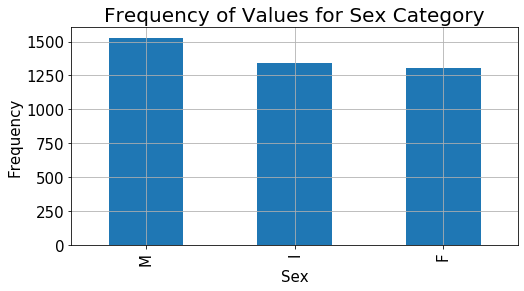

In [7]:
df['Sex'].value_counts().plot(kind='bar',figsize = (8,4))
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)
plt.title('Frequency of Values for Sex Category', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

### Numerical Variables

In [8]:
numerical = df.columns.tolist()
numerical.remove('Sex')

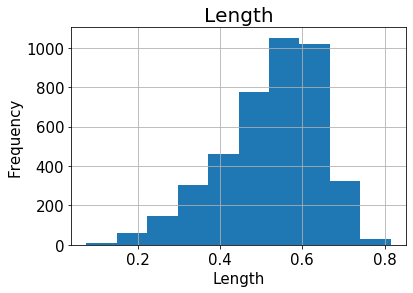

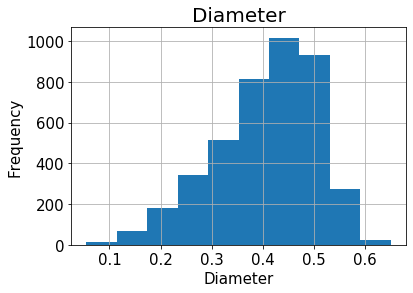

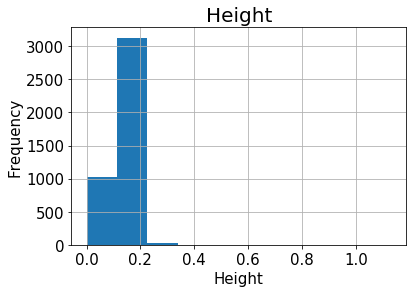

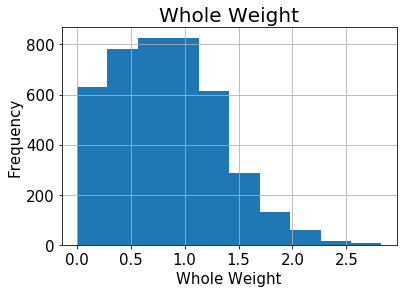

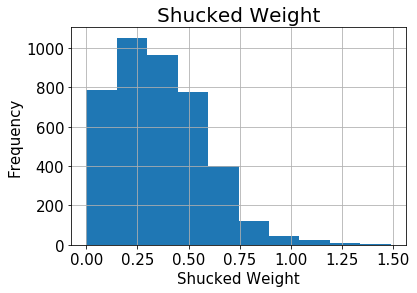

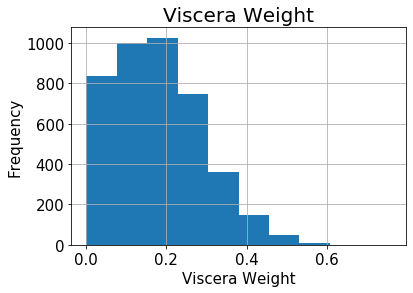

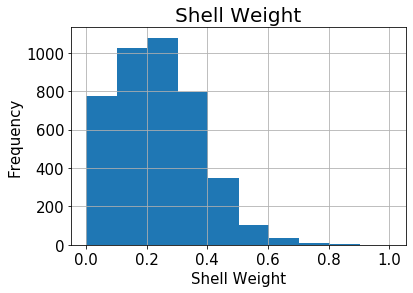

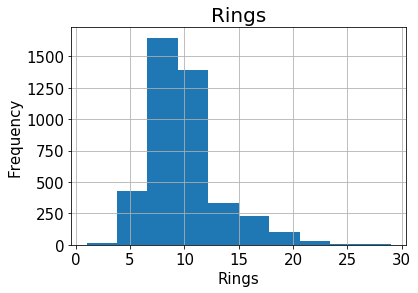

In [9]:
for i in numerical:
    df[i].hist(figsize = (6,4))
    plt.xlabel(i, fontsize = 15)
    plt.ylabel('Frequency',fontsize = 15)
    plt.title(i, fontsize = 20)
    plt.tick_params(axis="x", labelsize=15)
    plt.tick_params(axis="y", labelsize=15)
    plt.grid(True)
    plt.show()

## Formatting the variables

### One Hot Encoding

There is one variable that is going to be hot encoded:
- `Sex`

In [10]:
#Hot encoding protocol type to include the variable in the ML model
hot_encoded = ['Sex']

for i in hot_encoded:
    for j in df[i].unique():
        df.loc[:,j] = (df.loc[:,i] == j).astype(int)

first_list = []
for i in hot_encoded:
    x = df[i].unique()
    y = x.tolist()
    first_list.append(y)
    
one_hot = []    
for sublist in first_list:
    for item in sublist:
        one_hot.append(item)

In [11]:
df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,M,F,I
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1,0,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1,0,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,1,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1,0,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,0,1


In [12]:
one_hot

['M', 'F', 'I']

### Binary Variables

As mentioned in the assignment, the first run for the SVM would be with the target variable as Binary number based on the continuous value.

In [13]:
tr = df['Rings']
binomial = []
for i in range(len(tr)):
    b = tr[i]
    if b < 11:
        n = 0
    else:
        n = 1
    binomial.append(n)

df['Rings_Binomial'] = binomial

In [14]:
df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,M,F,I,Rings_Binomial
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1,0,0,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1,0,0,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,1,0,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1,0,0,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,0,1,0


In [15]:
df['Rings_Binomial'].value_counts()

0    2730
1    1447
Name: Rings_Binomial, dtype: int64

As it is possible to see from the numbers for the target variable: `Rings_Binomial` the two possible are in the same scale of magnitude, therefore no class imbalance correction is needed (at least no for this assignment).

# Analysis

For this assignment and since the goal is to explore **SVM** and there is not an excessive amount of features, all features are going to be use. Understanding that feature selection is a vital step for this analysis in a real/work situation.

In [16]:
features = df.columns.tolist()
features.remove('Sex')
features.remove('Rings')
features.remove('Rings_Binomial')

For this part of the analysis the model is going to have the following features:

In [17]:
features

['Length',
 'Diameter',
 'Height',
 'Whole Weight',
 'Shucked Weight',
 'Viscera Weight',
 'Shell Weight',
 'M',
 'F',
 'I']

## SVC review

### Split Data Set

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import *

In [19]:
#Split the data
variables = df[features]
label = df['Rings_Binomial']
X_train, X_test, y_train, y_test = train_test_split(variables, label, test_size=0.30, random_state=42)

### Hyperparameter Settings for SVC

In [20]:
from sklearn import svm, metrics
from sklearn.metrics import classification_report

kernel_options = ['linear','poly','rbf', 'sigmoid']
cost_options = [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4]
gamma_options = ['scale', 'auto']
degree_options = [2,3,4,5,6,7,8]

svc_grid = {'kernel': kernel_options, 
           'C': cost_options,
           'gamma':gamma_options,
           'degree':degree_options}

svc_base = svm.SVC()

svc_hyper = RandomizedSearchCV(estimator = svc_base, param_distributions = svc_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
svc_hyper.fit(X_train, y_train)

x = svc_hyper.best_params_
x

Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'kernel': 'poly', 'gamma': 'scale', 'degree': 8, 'C': 1.4}

### Performance Evaluation of the SVC Model

In [21]:
#Function to calculate performance parameters based on Predictions and Actual values from the testing group
def perfomance_values(T,Y,header):
    print("\n\n#############\Classifier: #############\n", header)
    # Confusion Matrix
    CM = confusion_matrix(T, Y)
    print ("\n\nConfusion matrix:\n", CM)
    tn, fp, fn, tp = CM.ravel()
    print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
    AR = accuracy_score(T, Y)
    ER = 1.0 - AR
    P = precision_score(T, Y)
    R = recall_score(T, Y)
    F1 = f1_score(T, Y)
    print ("\nAccuracy:", round(AR,4), ",Error Rate:", round(ER,4), ",Precision:", round(P,4), ",Recall:", round(R,4), ",F1 Score:",round(F1,4))
    return AR, ER, P, R, F1

#Function to make sure the output is a boolean as it is needed for the roc_curve
def booleans(vector):
    final = []
    for i in vector:
        if i == 1:
            i = 0
        else:
            i = 1
        final.append(i)
    return final

#Function to train the model and obtain the perfomance values from each model (in a plot form)
def classifier_performance(V, header, X_train, X_test, y_train, y_test):
    accuracy_rate = []
    error_rate = []
    precision = []
    recall = []
    f1_score = []
    for i in range(len(header)):
        V[i].fit(X_train, y_train)
        proba = V[i].predict_proba(X_test)[:,1]#Predictions and probabilities
        prediction = V[i].predict(X_test)
        #Creating a Data Frame for the Test, Prediction and Probaility Data
        T = y_test.tolist()
        Y = prediction.tolist()
        y = proba.tolist()
        Y = booleans(Y)
        T = booleans(T)
        AR, ER, P, R, F1 = perfomance_values(T,Y,header[i])
        accuracy_rate.append(AR)
        error_rate.append(ER)
        precision.append(P)
        recall.append(R)
        f1_score.append(F1)
        allvalues = [AR, ER, P, R, F1]
    return allvalues, prediction

In [22]:
#Classifiers
svc_model = svm.SVC(gamma=x['gamma'], kernel = x['kernel'], C = x['C'], degree = x['degree'],probability=True)

#List for Classifiers and Names
header = ["SVM"]
V = [svc_model]

In [23]:
#Running and obtaining performance values from the Models listed above
svt_performance = classifier_performance(V, header, X_train, X_test, y_train, y_test)



#############\Classifier: #############
 SVM


Confusion matrix:
 [[246 168]
 [ 97 743]]

TP, TN, FP, FN: 743 , 246 , 168 , 97

Accuracy: 0.7887 ,Error Rate: 0.2113 ,Precision: 0.8156 ,Recall: 0.8845 ,F1 Score: 0.8487


In [24]:
accurarcy = svt_performance[0][0]
print('Correctly Classified: {}%'.format(round(accurarcy*100)))

Correctly Classified: 79%


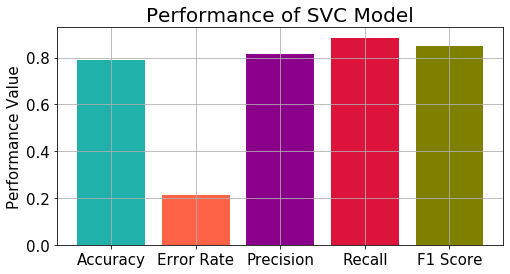

In [25]:
y = ['Accuracy', 'Error Rate',  'Precision', 'Recall', 'F1 Score']
fig, ax = plt.subplots(figsize = (8,4))    
ax.bar(y, svt_performance[0], color = ['lightseagreen', 'tomato', 'darkmagenta', 'crimson', 'olive'])
plt.title('Performance of SVC Model', fontsize = 20)
plt.ylabel('Performance Value',fontsize = 15)  
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

## SVR review

In [26]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

### Split Data Set

In [27]:
#Split the data
label_reg = df['Rings']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(variables, label_reg, test_size=0.30, random_state=42)

### Hyperparameter Settings for SVR

In [28]:
from sklearn import svm, metrics
from sklearn.metrics import classification_report

kernel_options = ['linear','poly','rbf', 'sigmoid']
degree_options = [2,3,4,5,6,7,8]
cost_options = [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4]
gamma_options = ['scale', 'auto']

svr_grid = {'kernel': kernel_options, 
           'C': cost_options,
           'gamma':gamma_options,
           'degree':degree_options}

svr_base = svm.SVR()

svr_hyper = RandomizedSearchCV(estimator = svr_base, param_distributions = svr_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
svr_hyper.fit(X_train_reg, y_train_reg)

w = svr_hyper.best_params_
w

Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'kernel': 'poly', 'gamma': 'scale', 'degree': 5, 'C': 1.4}

### Performance Evaluation of the SVR Model

In [29]:
svr_model = svm.SVR(gamma = w['gamma'], kernel = w['kernel'], C = w['C'], degree = w['degree'])
svr_trained = svr_model.fit(X_train_reg, y_train_reg)

In [30]:
y_pred = svr_trained.predict(X_test_reg)

In [31]:
from sklearn.metrics import mean_squared_error
mean_sq_error = mean_squared_error(y_test_reg, y_pred, squared=False) #if True then it is RMSE
print('Mean Sq Error: {}'.format(mean_sq_error))

Mean Sq Error: 2.166886040171582


In [32]:
import statistics as stats
variance_of_test = stats.variance(y_test_reg)
variance_of_model = stats.variance(y_pred)
print('Variance of Test Data: {}'.format(variance_of_test))
print('Variance of Prediction: {}'.format(variance_of_model))

Variance of Test Data: 10.162661605766575
Variance of Prediction: 5.26177845105823


# Summary of Models Performance.

#### SVC Model Performance:

| Performance | Value |
| -- | --|
| Accuracy | 0.7887 |
| Error Rate | 0.2113 |
| Precision | 0.8156 |
| Recall | 0.8845 |
| F1 Score | 0.8487 |


#### SVR Model Performance:

| Performance | Value |
| -- | --|
| MSE | 2.167 |
| Variance of Test Data | 10.16 |
| Variance of Prediction | 5.26 |